# Homework 5 - Assigment 2

### import cleaned data

In [1]:
# basic imports 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import nltk
import pycountry
from nltk.sentiment import SentimentIntensityAnalyzer


# filenames
clean_emails_filename ='preprocessed_emails.csv'
clean_emails = pd.read_csv(clean_emails_filename,index_col = 0, header = 0).dropna(how='all')

In [2]:
clean_emails.head()

,0
0,wow
1,2011 945 latest syria aid qaddafi sid hrc memo...
2,chri steven thx
3,cairo condemn final
4,11 2011 136 huma abedin latest syria aid qadda...


### Countries

In [3]:
countries = {}

for c in pycountry.countries:
    countries[c.name] = [c.name.lower(), c.alpha_2.lower(), c.alpha_3.lower()]
    
print('Number of countries : {}.'.format(len(countries)))
countries

Number of countries : 249.


{'Afghanistan': ['afghanistan', 'af', 'afg'],
 'Albania': ['albania', 'al', 'alb'],
 'Algeria': ['algeria', 'dz', 'dza'],
 'American Samoa': ['american samoa', 'as', 'asm'],
 'Andorra': ['andorra', 'ad', 'and'],
 'Angola': ['angola', 'ao', 'ago'],
 'Anguilla': ['anguilla', 'ai', 'aia'],
 'Antarctica': ['antarctica', 'aq', 'ata'],
 'Antigua and Barbuda': ['antigua and barbuda', 'ag', 'atg'],
 'Argentina': ['argentina', 'ar', 'arg'],
 'Armenia': ['armenia', 'am', 'arm'],
 'Aruba': ['aruba', 'aw', 'abw'],
 'Australia': ['australia', 'au', 'aus'],
 'Austria': ['austria', 'at', 'aut'],
 'Azerbaijan': ['azerbaijan', 'az', 'aze'],
 'Bahamas': ['bahamas', 'bs', 'bhs'],
 'Bahrain': ['bahrain', 'bh', 'bhr'],
 'Bangladesh': ['bangladesh', 'bd', 'bgd'],
 'Barbados': ['barbados', 'bb', 'brb'],
 'Belarus': ['belarus', 'by', 'blr'],
 'Belgium': ['belgium', 'be', 'bel'],
 'Belize': ['belize', 'bz', 'blz'],
 'Benin': ['benin', 'bj', 'ben'],
 'Bermuda': ['bermuda', 'bm', 'bmu'],
 'Bhutan': ['bhutan', 'b

In [4]:
vader_analyzer = SentimentIntensityAnalyzer()

sentiments = {}
id = 1

for i in np.arange(clean_emails.shape[0]): 
    mail = clean_emails.iloc[i,0]
    score = vader_analyzer.polarity_scores(mail)['compound']
    tokens = set(nltk.word_tokenize(mail))
    for country, names in countries.items():
        if not tokens.isdisjoint(set(names)):
            sentiments[id] = [country, score]
            id += 1

In [9]:
df = pd.DataFrame.from_dict(sentiments, orient='index')
df.columns = ['Country', 'Sentiment']
df.head()

,Country,Sentiment
1,Libya,0.0000
2,Libya,0.0000
3,United States,-0.5994
4,Libya,-0.1779
5,Egypt,-0.1779


In [10]:
df = df.groupby('Country').agg('mean').sort_values('Sentiment')
#df.reset_index(level=0, inplace=True)
df.head()

,Sentiment
Country,
Latvia,-0.97610
Bermuda,-0.64580
Vanuatu,-0.60885
Syrian Arab Republic,-0.38395
Gibraltar,-0.37380


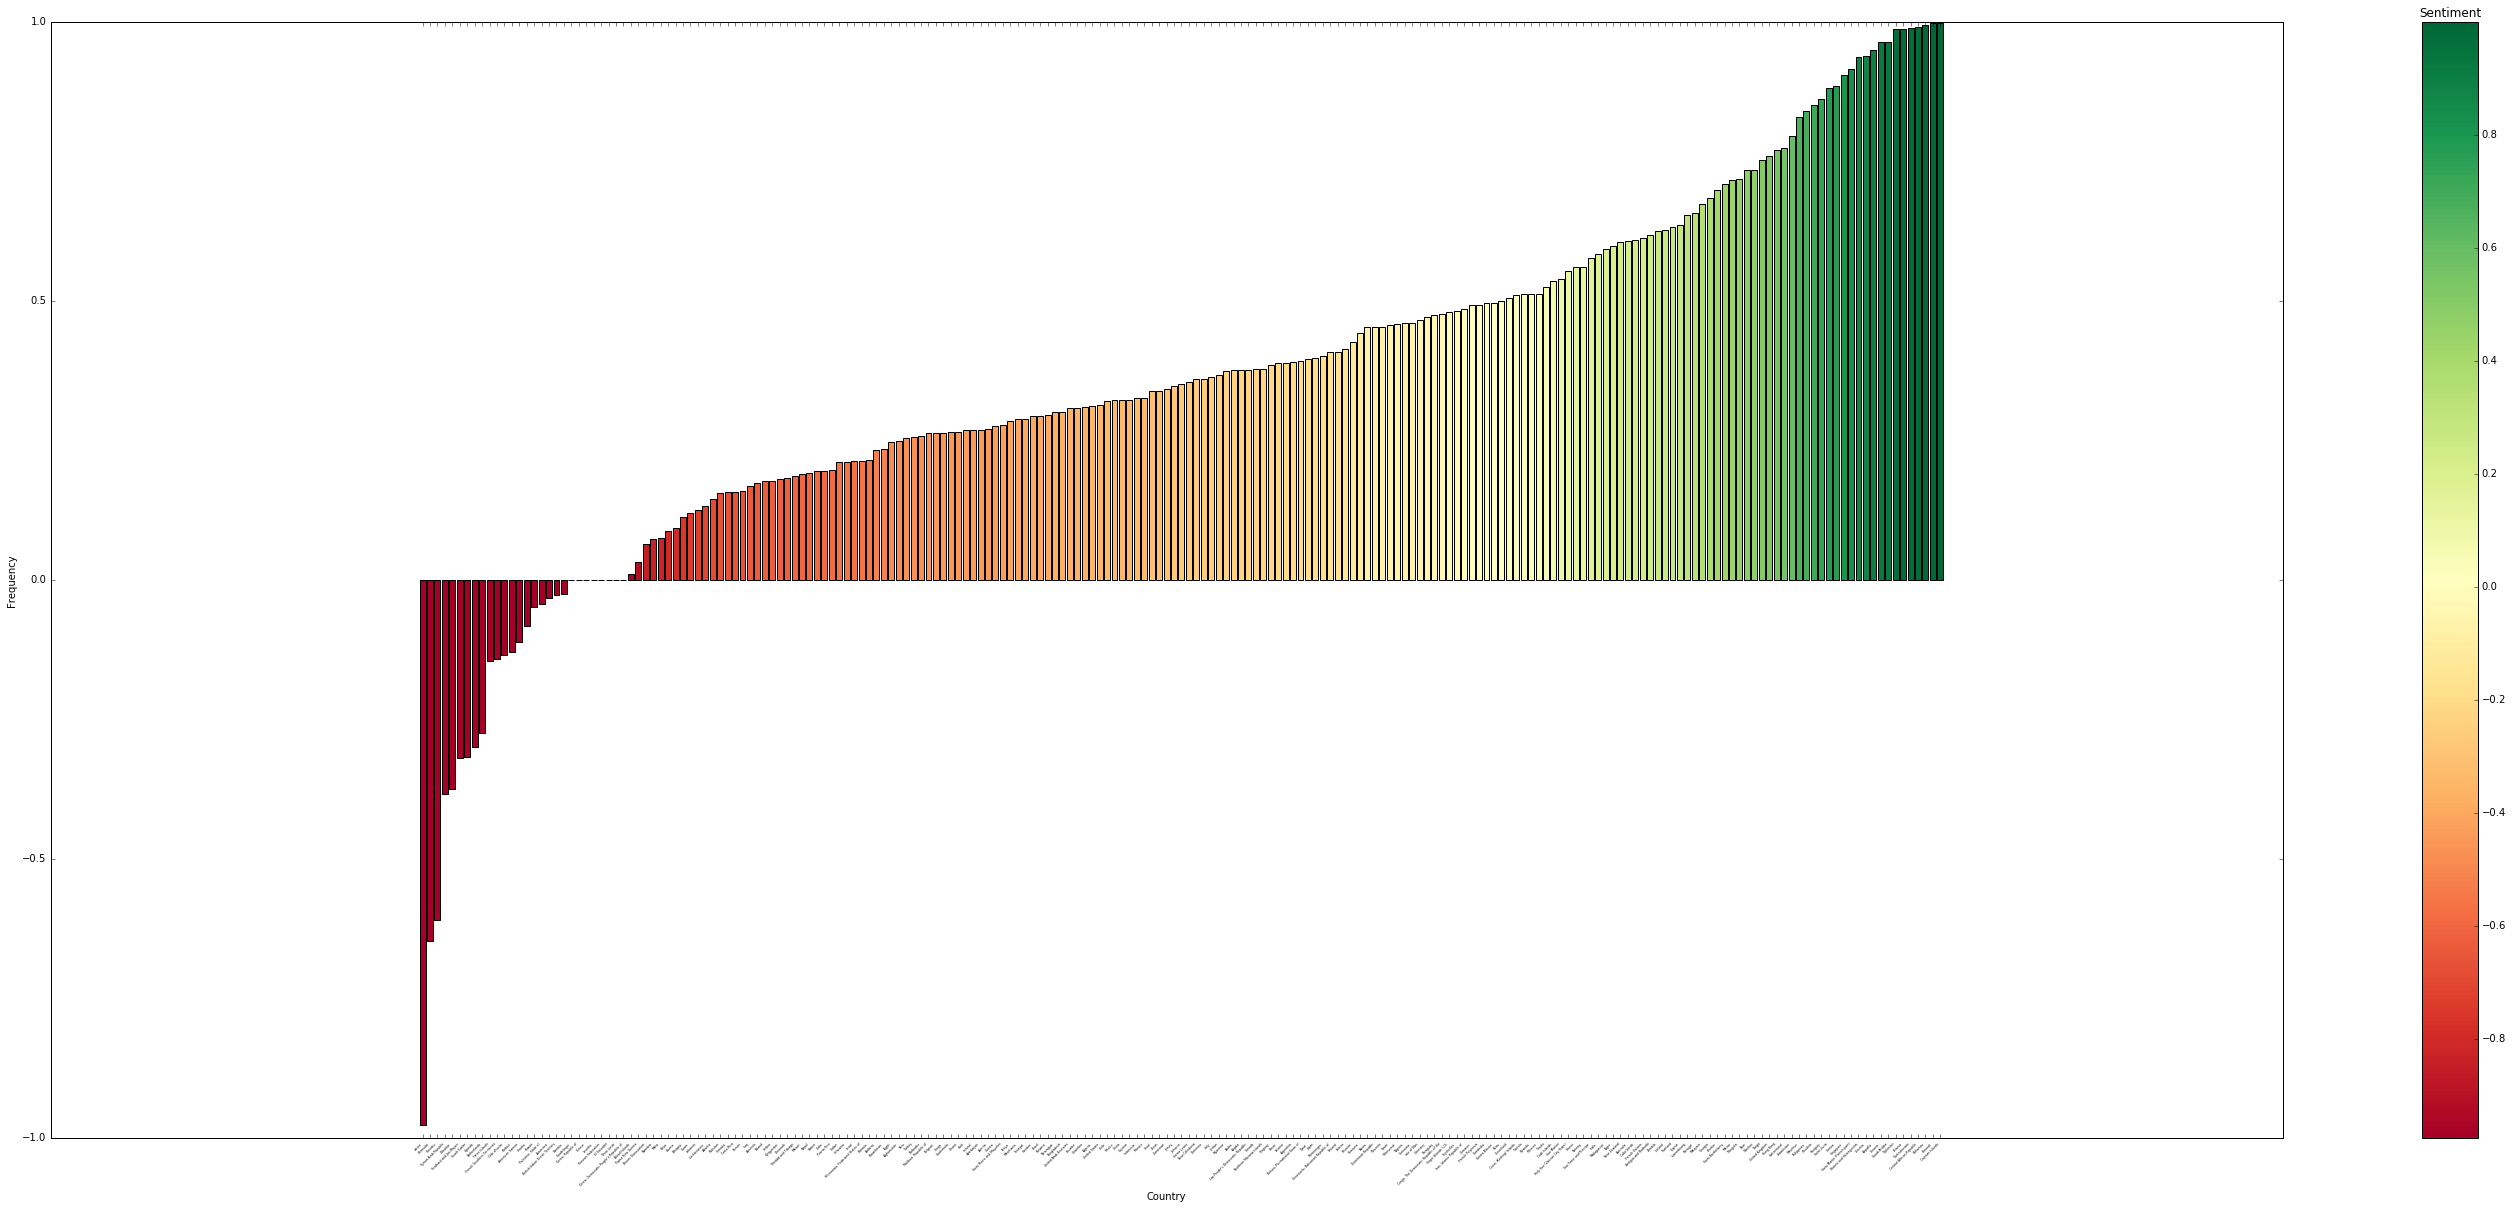

In [17]:
# Set up colors : red to green
plt.figure(figsize = (50,20))
y = np.array(df['Sentiment'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(df.shape[0]), df['Sentiment'], align='center', tick_label=df.index, color=colors)
plt.xticks(rotation=45, ha='right',fontsize = 3)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

In [25]:
neg_df = df[df.Sentiment<=0]
neg_df.head()

,Sentiment
Country,
Latvia,-0.97610
Bermuda,-0.64580
Vanuatu,-0.60885
Syrian Arab Republic,-0.38395
Gibraltar,-0.37380


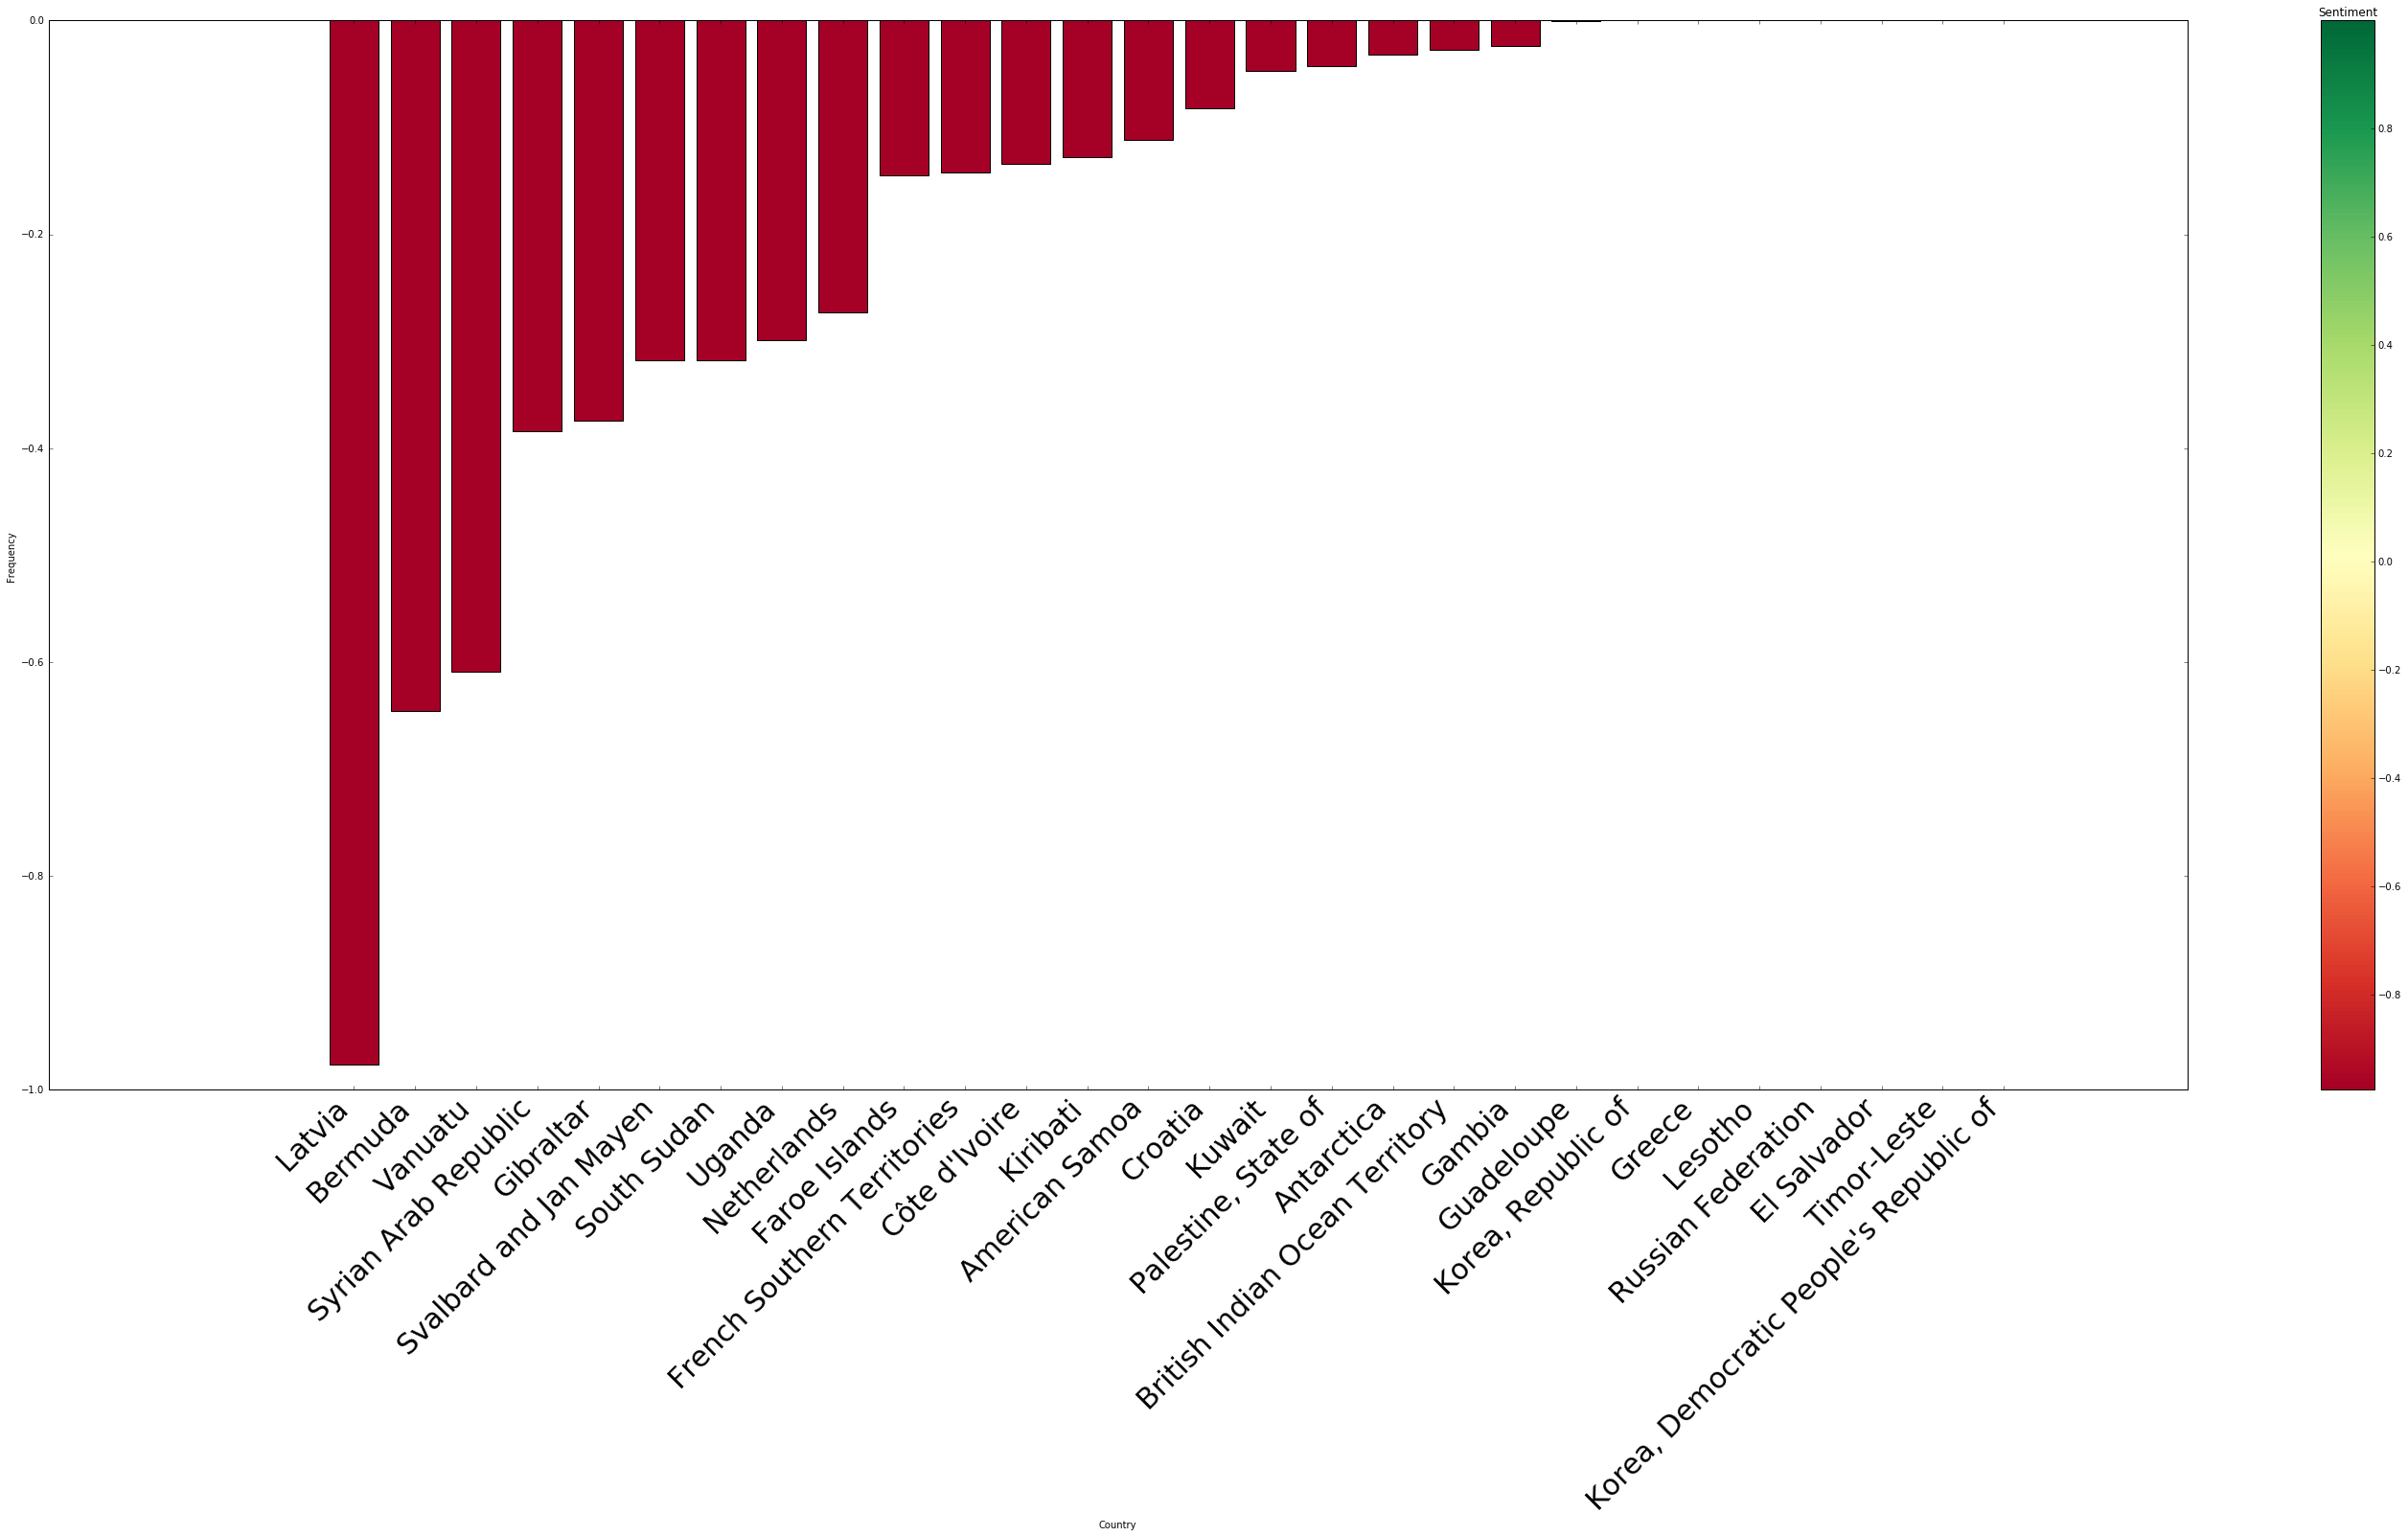

In [28]:
plt.figure(figsize = (50,20))
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

plt.bar(range(neg_df.shape[0]), neg_df['Sentiment'], align='center', tick_label=neg_df.index, color=colors)
plt.xticks(rotation=45, ha='right',fontsize = 30)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()



In [23]:
pos_df = df[df.Sentiment>0]
pos_df.head()

,Sentiment
Country,
Åland Islands,0.011533
Papua New Guinea,0.031833
Brunei Darussalam,0.064386
Namibia,0.074000
Malta,0.074700


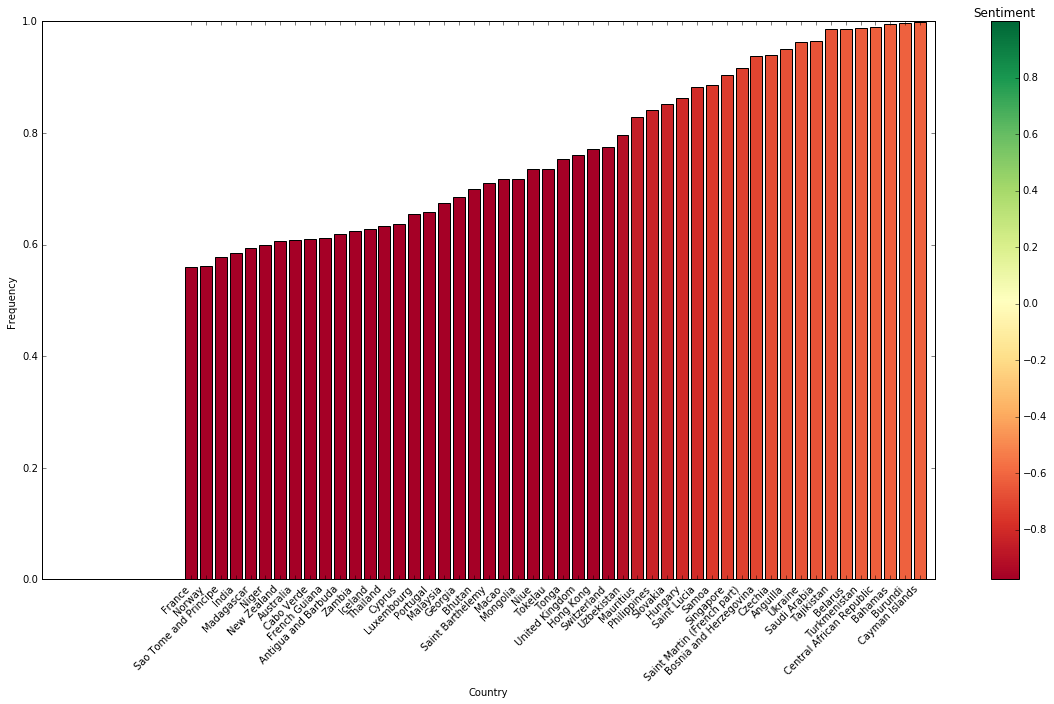

In [34]:
plt.figure(figsize = (20,10))
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

plt.bar(range(pos_df[-50:].shape[0]), pos_df[-50:]['Sentiment'], align='center', tick_label=pos_df[-50:].index, color=colors)
plt.xticks(rotation=45, ha='right',fontsize = 10)
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()